# A sphere with Dleto

CC-BY Brooksbank, Kassabov, Wilson

This notebook will walk you through the creation of a tensor with an embedded surface.  We will use a sphere but you can change the parameters to get a look at the effects.

## Step 1: Installing necessary packages

This program is written in Julia and so first we need to load Julia and IJulia if that is not already part of your system.  This my involve upgrading your Python tools and restarting your Jupyter notebook, VS code or your favorite notebook shell.  While in principle this is compatible with Julia 1.7, we have successfully tested it with later versions as well.

Run the following cell.  A successful run will report something like
```
Julia kernel is active!
Julia version: 1.10.3
```
If an error occurs, uncomment the first 5 lines and rerun the cell.  This may require you to restart your notebook.  If this does not fix it, consider putting the error message into an LLM to get supporting installation instructions relevant to your setting.

In [2]:
## Uncomment if you do not have iJulia installed
# using Pkg
# Pkg.add("IJulia")
# This installs Julia's Jupyter kernel without Python dependencies
# println("IJulia installed! Restart VS Code and select Julia kernel.")

# Ensure Julia kernel is properly recognized  
# This notebook requires Julia kernel for execution and export
using IJulia
println("Julia kernel is active!")
println("Julia version: ", VERSION) # Fix Jupyter/Julia setup - Install IJulia for Julia notebooks


Julia kernel is active!
Julia version: 1.10.3


## Step 2: Installing Dleto

To load `OpenDelto` run the next cell.  This assumes that you have cloned the full [Git Repository](https://github.com/thetensor-space/OpenDleto) and that you have launched this notebook from the subfolder `./examples/`

In [8]:
include("../Dleto.jl") 


plotTensor (generic function with 2 methods)

## Step 3: Plotting a sphere in a tensor

Now lets approximate the surface of a sphere as an array and add some randomization surrounding it.  

The command `randomSurfaceTensor(u,v,w,t)` builds a tensor with nonzero values 
clustered near `(i,j,k)` whenever $u[i]+v[j]+w[k]\approx 0$.

Let us try this with a sphere with equation 
$$r^2=(x-a)^2+(y-b)^2+(z-c)^2$$
To make this discrete we select values `u[i]`, `v[j]` and `w[k]` 
by the following rule.
$$\begin{aligned}
u[i] & \approx (i-c)^2-r^2/3\\
v[j] & \approx (j-c)^2-r^2/3\\
w[k] & \approx (k-c)^2-r^2/3
\end{aligned}
$$
Notice that from this choice we get the following.
$$\begin{aligned}
0 & \approx u[i]+v[j]+w[k]\\
  & \approx \left((i-a)^2-\frac{r^2}{3}\right)+\left((j-b)^2-\frac{r^2}{3}\right)+\left((k-c)^2-\frac{r^2}{3}\right)
\end{aligned}
$$
Hence, 
$$0\approx u[i]+v[j]+w[k]\quad \Rightarrow \quad (i-a)^2+(j-b)^2+(k-c)^2\approx r^2.$$
This is what we need to store a discretized approximation of a sphere of radius $r$ and center $(a,b,c)$.

First let us make a sphere with 11 pixels, i.e. indices $i,j,k\in \{0,\ldots, 10\}$ centered at $(5,5,5)$ radius $5$.

Fiddle with the parameters until you see their effect.  For example you might not wish to fit the full sphere, you can edit the range form (0:1:10) for one of the axes to make is shorter.  It will cut through the sphere.

In [9]:
a = 5.0; b = 5.0; c = 5.0; r = 5.0;
Ues = [(0:1:10)...] .|> i-> ((i-a)*(i-a)- (r*r)/3.0)
Ves = [(0:1:10)...] .|> j-> ((j-b)*(j-b)- (r*r)/3.0)
Wes = [(0:1:10)...] .|> k-> ((k-c)*(k-c)- (r*r)/3.0)


sphere5 = randomSurfaceTensor( Ues, Ves, Wes, 1.5)



11×11×11 Array{Float64, 3}:
[:, :, 1] =
 0.0  0.0  0.0  0.0   0.0        0.0      0.0      0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0        0.0      0.0      0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0        0.0      0.0      0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0        0.0      0.0      0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0        1.47634  0.0      0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  -0.0144458  1.14171  0.28413  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0        1.51879  0.0      0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0        0.0      0.0      0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0        0.0      0.0      0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0        0.0      0.0      0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0        0.0      0.0      0.0  0.0  0.0  0.0

[:, :, 2] =
 0.0  0.0   0.0      0.0        0.0       …   0.0        0.0       0.0  0.0
 0.0  0.0   0.0      0.0        0.0           0.0        0.0       0.0  0.0
 0.0  0.0   0.0      0.0 

## Step 4: Visualization

It will help to see the tensor as a graphic we can visualize as 3D.  There are many visualization tools in Jupyter, but to pick just one we can use Plotly.  You may need to install PlotlyJS if you do not yet have it installed.  If so uncomment the top two lines.

`plotTensor` returns a 3D scatter plot that you can manipulate with a mouse, rotate, zoom, and export as `png` format.  **Caution** With large dense tensors Plotly may take a long time to load or may fail to rotate or even display content.  For sparse tensors you may need to work with ranges around 100 x 100 x 100, and for dense tensors reduce that to 50 x 50 x 50, though specific ranges depend on your hardware and installations.

`plotTensor` also supports an optional second parameter with a threshold to drop points of a tensor that are too small to be seen.  This can speed up displays but may suppress some points.


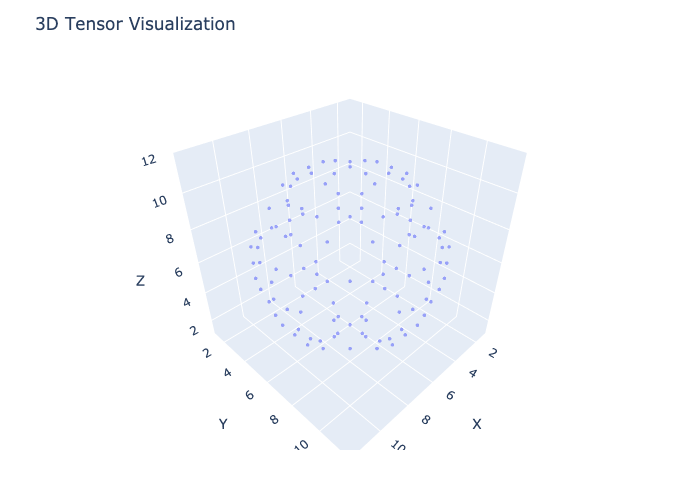

In [10]:
# Pkg.add( "PlotlyJS" )
# using PlotlyJS

plotTensor(sphere5)

## Step 5: Scaling up.

Now lets jump to something larger.  We can repeat the method above but this time use a radius 50 sphere, centered at (50, 50, 50).  It will make a 101 x 101 x 101 tensor.  Once more you can play with the parameters and see the effects.  


In [11]:
Ues = [(0:1:50)...] .|> i-> ((i-25.0)*(i-25.0)- (25.0*25.0)/3.0)
Ves = [(0:1:50)...] .|> j-> ((j-25.0)*(j-25.0)- (25.0*25.0)/3.0)
Wes = [(0:1:50)...] .|> k-> ((k-25.0)*(k-25.0)- (25.0*25.0)/3.0)

sphere51 = randomSurfaceTensor( Ues, Ves, Wes, 4); # No need to print.


For a tensor this large we may want an option other than printing to the screen or visualizing.  We can for example save the tensor to a file.  Use the `saveTensorToFile` command.  We will be making 3 versions of this tensor by the end of this notebook so we start by labeling this one as `source` and also list its dimensions.

Similar to the visualization `plotTensor` you can provide an optional final number like `0.001` to drop any coordinates whose absolute value is smaller than `0.001` and save on storage.  Of course this creates a coarser approximation to your original tensor so you will need to work with the tolerances you deem appropriate.

For sparse tensors in the range of 100 x 100 x 100, plotting tends to still be robust, but it may load slower and render less smoothly depending on the parameters choosen.

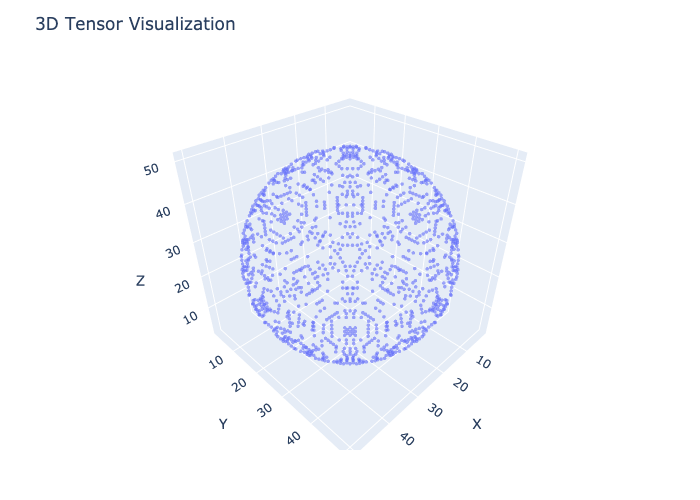

In [12]:
saveTensorToFile(sphere51, "sphere-51x51x51-source.txt"); # Save a copy.
    
plotTensor(sphere51, 0.001) # try taking a picture with the camera icon

## Step 6: Randomizing the source basis
Dleto works by detecting a hidden constraint equation in a given tensor.  So far the tensors we created are obviously equations of a sphere.  So what we do next is randomize the bases of the x, y, and z axes.  In the case of our original sphere with radius 5 the entire tensor fit inside $11 \times 11 \times 11$-array.  This means that are operating in 3 different 11-dimensional vector spaces.  So we apply a random $11 \times 11$ invertible matrix $X$ to the slices `tensor[i,:,:]`, an invertible matrix $Y$ to each slice `tensor[:,j,:]` and finally an invertible matrix $Z$ to the each `tensor[:,:,k]`.  If you changed the dimensions then the relevant matrix sizes will change accordingly.  The command `randomTensor` uses the arrays internally stored dimensions to calculate the appropriate changes.  The return includes not only the resulting tensor but also the matrices $X,Y,Z$ used to affect the change.  To access the resulting tensor use the record name `.tensor`.  To access the coordinate changes use `.Xes`, `.Yes` and `.Zes`.

Here is our small sphere randomized, it likely looks completely filled in like dense tensor.

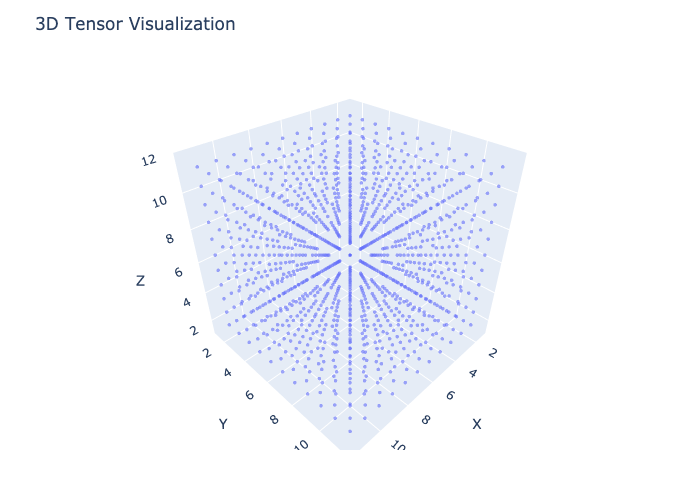

In [13]:
hidden_sphere5 = randomizeTensor(sphere5)
plotTensor(hidden_sphere5.tensor)

And here is our larger sphere randomized.  Since visualization can be slow if not impossible for large dense matrices, this might be a step more suitable to save as a file and do statistical comparisons.  For the default dimensions uses here it may take up to a minute to render and the result may appear like a solid cube.

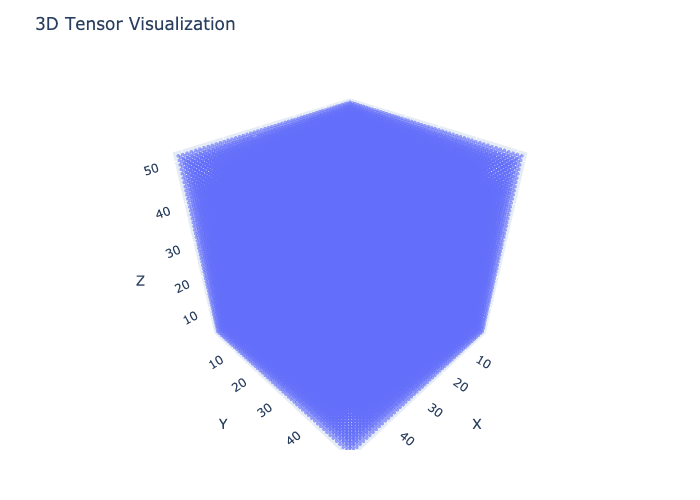

In [14]:
hidden_sphere51 = randomizeTensor(sphere51)
saveTensorToFile(hidden_sphere51.tensor, "sphere-51x51x51-rand.txt"); # Save instead.
plotTensor(hidden_sphere51.tensor, 0.0001) # If too dense then visualization may fail.

Another way to inspect the results is to print some random slice of the original and compare it to to the same slice in the randomized tensor.  Since the original is a sphere, a random slice is mostly 0's.  When we plot the randomized tensor it will appear dense.

In [ ]:
sphere51[:,:,10]


In [ ]:
hidden_sphere51.tensor[:,:,10]

## Step 7: Stratification

Now we finally get to applying the Dleto(chisel) algorithms.  We will be using the universal derivation chisel of valence 3 which is select by command `toSurfaceTensor`.  You just give it a tensor and you get back a tensor along with a new change of basis.

Let us begin with the radius 5 sphere.  You will notice that we did not reconstruct a sphere.  Instead you will see thick boxes approximating one octant of a sphere.  This is because a sphere is not the type of surface that is stable under Dleto chiselling.  In particular Dleto does not distinguish between antipodal points along each axis.  So the effect is that the sphere has been folded in half along the x-axis to make a hemisphere twice as thick, then along the y-axis to make a quarter sphere 4 times as thick, and then along the z-axis to make an octant 8 times as thick. For a discreted sphere there may be fewer than 8 points in alignment which means the blocks may be thinner.

A further artifact of is that the sphere was discrete, and with small radius 5 those discrete effects fold up into more noticeable block shapes.  

Finally, the algorithm uses a small amount of randomized methods to improve performance. 
Try re-running the cell a few times and watch what happens.  If you notice a few blocks being reordered, this is an effect cause by the randomized selection of solution.  The random choices make subtle rounding differences which can in close cases permute adjecent blocks.  For a highly discrete surface like the radius 5 sphere these permutation may be more noticeable but they still cluster along a discrete 8-think octant of a sphere.  With higher resolutions these permutations become less perceptible. 


	Building linear system...
  0.079666 seconds (72.10 k allocations: 7.163 MiB, 99.63% compilation time)

	Computing singular vectors for (198, 1331)...
	
eigens[1] = [-9.957167707106524e-15, 7.640644006829721e-15, 1.2838649258489387e-14, 3.4908303550347323e-14, 2.2157040768403937, 2.7537810219950463, 4.047665822075879, 4.649413326849191, 5.185565241482081, 5.270934559560635, 5.552583855507765, 5.689537518021465, 5.924221048404111, 6.301784793057301, 6.380281061935494, 6.511349151816599, 6.729744014536184, 6.972589134889194, 7.152231821799718, 7.313157328928314]
  0.008422 seconds (2.89 k allocations: 528.266 KiB)

	Extracting matrices...
  0.013315 seconds (7.76 k allocations: 579.984 KiB, 99.69% compilation time)
  0.000004 seconds (2 allocations: 1.094 KiB)
  0.000002 seconds (2 allocations: 1.094 KiB)


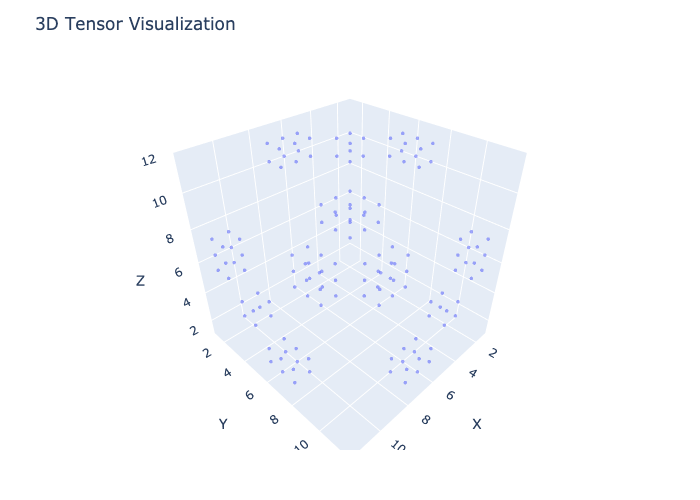

In [15]:
recovered_sphere5=toSurfaceTensor(hidden_sphere5.tensor)
plotTensor(recovered_sphere5.tensor, 0.000001)

Now we shift to he larger sphere.  This make take a minute to compute and longer if you have changed parameter sets.  The result is typically far more sparse than the input tensor and thus if you can visualize the input tensor then you should have no problem plotting the result.

If we begin with a sphere of radius 51 the result will again be an octant folding of that sphere, but the curvature should be more apparent than our smaller radius 5 sphere.  Once more there are a number of effects to consider, from altering parameters, to choosing a tolerance for how many digits of precision to include.  Those concepts are best analyzed using statistics and metrics on the actual tensors and not the visualization.


	Building linear system...
  2.167798 seconds (397.96 k allocations: 4.115 GiB, 17.78% gc time)

	Computing singular vectors for (3978, 132651)...
	
eigens[1] = [-7.147501411623091e-15, -2.3866651378098838e-15, 3.729229674396859e-14, 1.3223799079566878, 2.113303293809954, 2.1941687291976715, 3.652487882752923, 3.934201546976885, 4.31922272779646, 4.918573543408187, 5.620995166612744, 5.83117304051226, 5.86095923538823, 6.377038997417362, 6.5075281927126785, 7.053488312108413, 7.14156899152611, 7.203712750810252, 7.6194141586876025, 7.69017050892643]
 30.089366 seconds (5.37 k allocations: 122.905 MiB, 0.00% gc time)

	Extracting matrices...
  0.000147 seconds (3 allocations: 20.453 KiB)
  0.000010 seconds (4 allocations: 20.469 KiB)
  0.000969 seconds (4 allocations: 20.469 KiB)


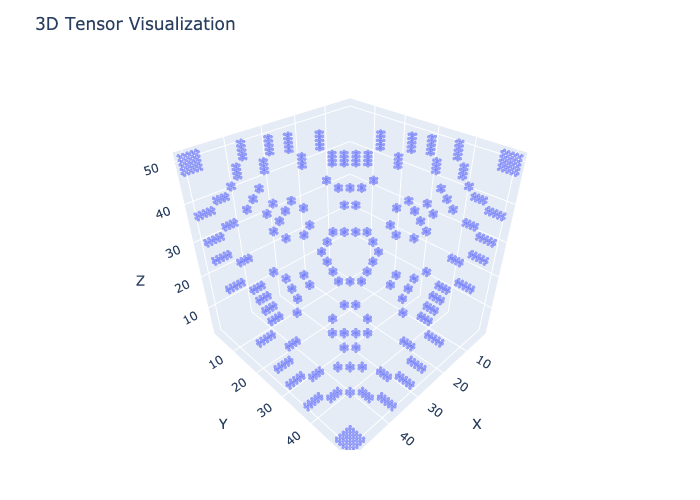

In [16]:
recovered_sphere51=toSurfaceTensor(hidden_sphere51.tensor)
saveTensorToFile(recovered_sphere51.tensor, "sphere-51x51x51-recov.txt"); # Save .
plotTensor(recovered_sphere51.tensor, 0.000001) ## try to plot


## Step 8: Analyzing the output

For the case of a sphere it is clear that the the Dleto chiseling has altered the input source. This is because Dleto is not designed to recover arbitrary surfaces but rather the resulting "convex-contour" surface.  As such, a direct comparison of the source to the recovered output maybe be quit large, but falls outside of the design of the algorithm.  A more intentional comparison is to first stratify the original tensor before randomization, produces statistics on that surface, than the compare those statistics to the one we get from the recovered surface.  Here are some steps to achieve this.

### Using a statistic
First use `toSurfaceTensor` on the source tensors.  Then use `testSurfaceTensor` along with all the output of the recovery.  This simply applies the change of basis back to reconstruct a new tensor that can be compared to the original and a difference is computed as single floating point number.  A number close to 0 indicates that the recovered form is a very close approximation to the original.

In [ ]:
# Chisel the source without randomization
chiseled_sphere5=toSurfaceTensor(sphere5)

# Calculate a metric of how close this approximates the surface.
s_orig = testSurfaceTensor(chiseled_sphere5.tensor, chiseled_sphere5.Xes, chiseled_sphere5.Yes, chiseled_sphere5.Zes)
# Compare to recovered from randomization.
s_recovered = testSurfaceTensor(recovered_sphere5.tensor, recovered_sphere5.Xes, recovered_sphere5.Yes, recovered_sphere5.Zes)

println("Surface metric for original sphere5: ", s_orig)
println("Surface metric for recovered sphere5: ", s_recovered)

In [ ]:
# Chisel the source without randomization
chiseled_sphere51=toSurfaceTensor(sphere51)

# Calculate a metric of how close this approximates the surface.
s_orig = testSurfaceTensor(chiseled_sphere51.tensor, chiseled_sphere51.Xes, chiseled_sphere51.Yes, chiseled_sphere51.Zes)

# Compare to recovered from randomization.
s_recovered = testSurfaceTensor(recovered_sphere51.tensor, recovered_sphere51.Xes, recovered_sphere51.Yes, recovered_sphere51.Zes)

println("Surface metric for original sphere51: ", s_orig)
println("Surface metric for recovered sphere51: ", s_recovered)


### Comparing file sizes
Another metric is to simply look at the file sizes of our stored tensors as these are more direct measure of the complexity and "sparsification" achieved by the algorithm.  Note that these are stored as text files of coordinate `i j k value`.  They compress roughly equally well in different formats so the comparison here appears to be format independent.  We also have the option to drop more or less precision and this too can effect storage.

In [ ]:
# Get file sizes for the three saved tensors
source_size = stat("thick-sphere-51x51x51-source.txt").size
rand_size = stat("thick-sphere-51x51x51-rand.txt").size
recov_size = stat("thick-sphere-51x51x51-recov.txt").size

println("File size for source tensor: ", source_size, " bytes")
println("File size for randomized tensor: ", rand_size, " bytes: ratio ", round(rand_size / source_size))
println("File size for recovered tensor: ", recov_size, " bytes: ratio ", round(recov_size / source_size))

In [ ]:
# Count nonzeros in the three sphere51 tensors
source_nnz = count(x -> x != 0, sphere51)
rand_nnz = count(x -> x != 0, hidden_sphere51.tensor)
recov_nnz = count(x -> x != 0, recovered_sphere51.tensor)

println("Number of nonzeros in source tensor: ", source_nnz)
println("Number of nonzeros in randomized tensor: ", rand_nnz)
println("Number of nonzeros in recovered tensor: ", recov_nnz)
println("Sparsification ratio (recovered/source): ", round(recov_nnz / source_nnz, digits=4))

In [ ]:

dropSmall(x) = abs(x) < 0.0001 ? 0 : x
source_nnz = count(x -> dropSmall(x) != 0, sphere51)
rand_nnz = count(x -> dropSmall(x) != 0, hidden_sphere51.tensor)
recov_nnz = count(x -> dropSmall(x) != 0, recovered_sphere51.tensor)

println("After dropping small values (<0.0001):")
println("Number of nonzeros in source tensor: ", source_nnz)
println("Number of nonzeros in randomized tensor: ", rand_nnz)
println("Number of nonzeros in recovered tensor: ", recov_nnz)
println("Sparsification ratio (recovered/source): ", round(recov_nnz / source_nnz, digits=4))

### Compare to linear algebra.
Finally you might want to compare the timing to the cost of some linear algebra problems like finding singular values of a matrix.  The complexity of our program is on the order of $O(n^6)$ for an $n\times n\times n$-tensor.  That's not great but we are finding something that is new so it wont get any slower than we have now.

So here is a random matrix of about the size of the operations we expect and the command compute its singular values.  You will see it is exceptionally faster.  So there is much room for improvement in our strategy.

In [ ]:

matrix_size = (3978, 132651)
random_matrix = randn(matrix_size...)

println("Computing SVD for a ", matrix_size, " matrix...")
@time svd_result = ArpackEigen(random_matrix)
println("Number of singular values: ", length(svd_result))